In [117]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import seaborn
seaborn.set(style='ticks')

from IPython.display import Audio

import numpy as np
import scipy

import mir_eval
import librosa

d = pd.read_csv("/Users/reyno392/Desktop/Programming/bigdataproject/output-final.csv")
d.describe()

,mfcss0,mfcss1,mfcss2,mfcss3,mfcss4,mfcss5,mfcss6,mfcss7,mfcss8,mfcss9,...,contrast3,contrast4,contrast5,contrast6,tonnetz0,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5
count,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,...,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000,15878.000000
mean,-423.909381,159.290538,-24.893228,15.019428,33.746356,-15.152955,1.543789,10.578178,-11.355057,2.482382,...,15.594197,17.163963,61.852865,14.330051,-0.007840,0.009440,0.019431,0.003478,0.000854,-0.003816
std,94.639789,29.435250,21.778312,11.841057,11.764870,10.258179,11.253760,8.561556,7.394772,8.888972,...,1.400902,1.495602,4.411277,1.967879,0.013069,0.018001,0.067605,0.067527,0.014739,0.019407
min,-931.677719,39.898847,-106.694800,-33.921526,-29.246400,-60.941695,-43.376065,-32.931751,-47.183815,-29.021087,...,11.467180,12.467453,20.932720,4.766859,-0.081372,-0.055369,-0.288997,-0.378189,-0.080152,-0.100362
25%,-476.017744,141.989375,-39.712573,7.045423,26.768538,-22.097443,-6.016731,5.768405,-16.221324,-3.295486,...,14.667270,16.149527,59.075275,13.317150,-0.013722,-0.001541,-0.017952,-0.025159,-0.004840,-0.011295
50%,-415.611308,161.921309,-23.979239,15.028690,34.455215,-15.092507,1.132838,11.312888,-11.326262,1.848496,...,15.400136,16.944605,62.039100,14.213044,-0.005926,0.008093,0.006747,0.004878,0.001855,-0.000704
75%,-361.143435,179.695510,-9.860378,23.253927,41.616460,-8.246649,10.071626,16.437185,-6.405290,9.174909,...,16.250967,17.948888,64.839505,15.451015,-0.000085,0.019736,0.042374,0.032940,0.007944,0.006958
max,-92.378454,258.706208,63.630408,64.957047,76.831597,22.143577,32.995945,40.878149,13.489550,32.437802,...,27.526058,29.728328,74.808438,34.170896,0.048793,0.157006,0.395262,0.394929,0.084532,0.083421


In [103]:
d.isnull().values.any()

False

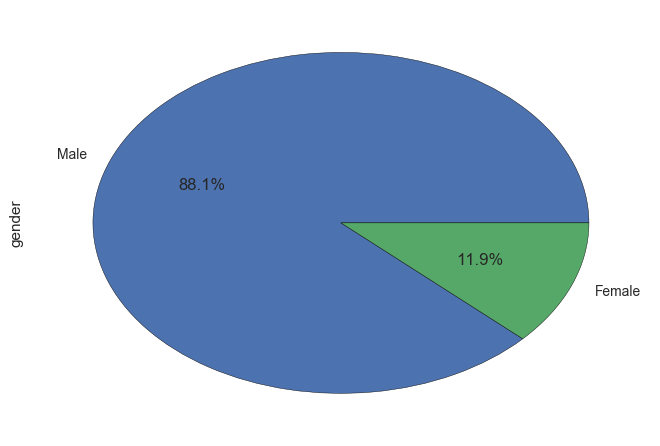

In [104]:
d.gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

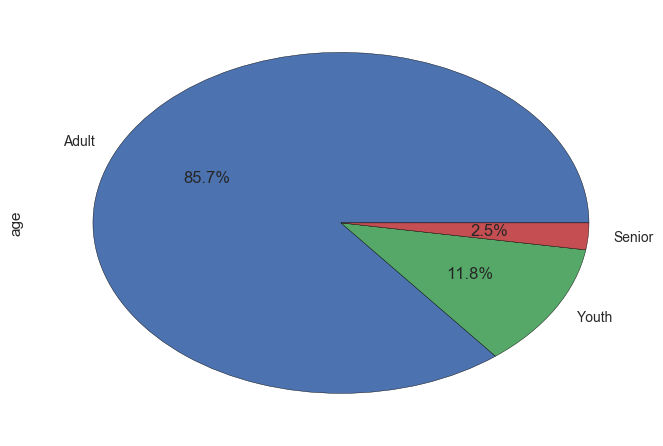

In [105]:
d.age.value_counts().plot(kind="pie", autopct='%1.1f%%')

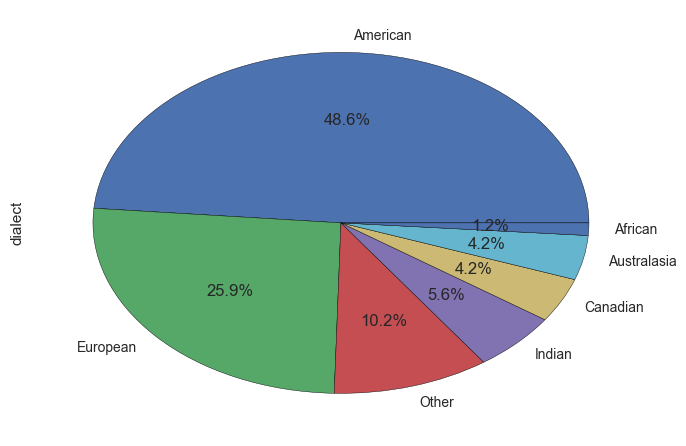

In [106]:
d.dialect.value_counts().plot(kind="pie", autopct='%1.1f%%')

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [108]:
d.keys()

Index(['Directory', 'mfcss0', 'mfcss1', 'mfcss2', 'mfcss3', 'mfcss4', 'mfcss5',
       'mfcss6', 'mfcss7', 'mfcss8',
       ...
       'contrast6', 'tonnetz0', 'tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4',
       'tonnetz5', 'gender', 'age', 'dialect'],
      dtype='object', length=197)

In [109]:
del d["Directory"]
Y_gender = d["gender"]
Y_age = d["age"]
Y_dialect = d["dialect"]
del d["gender"]
del d["age"]
del d["dialect"]
X = d

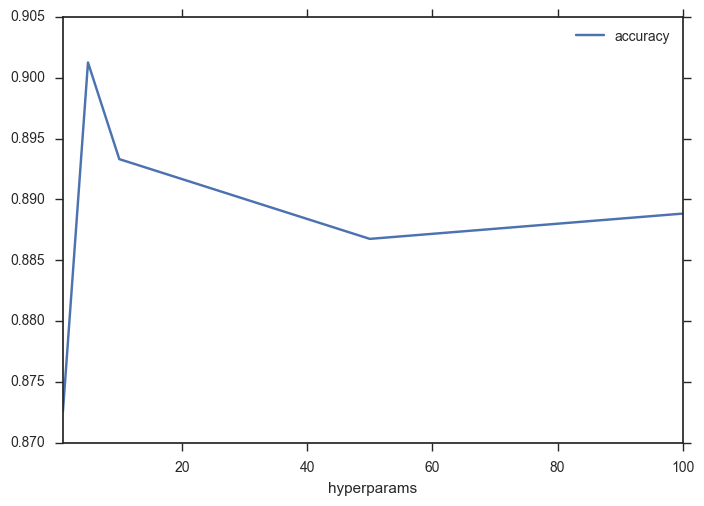

In [110]:
hyperparams = [1, 5, 10, 50, 100]
accuracy = []

for params in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth=params)
    scores = cross_val_score(clf, X, Y_gender, cv=5)
    accuracy.append(scores.mean())
    
d = pd.DataFrame({"hyperparams": hyperparams, "accuracy": accuracy})
d.plot(x="hyperparams", y="accuracy")

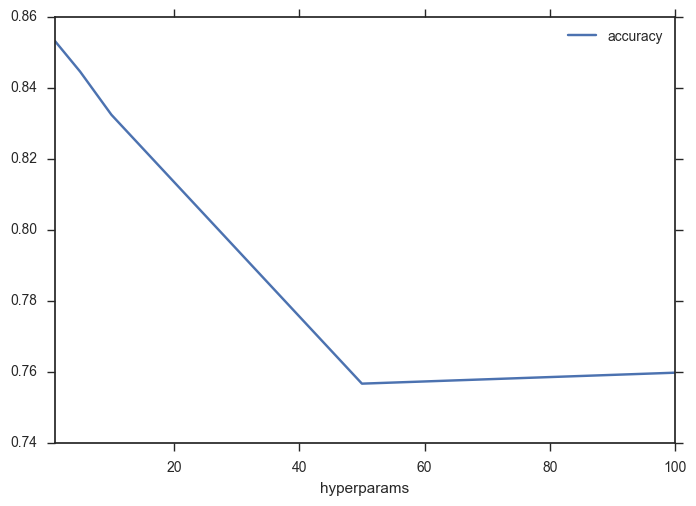

In [112]:
hyperparams = [1, 5, 10, 50, 100]
accuracy = []

for params in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth=params)
    scores = cross_val_score(clf, X, Y_age, cv=5)
    accuracy.append(scores.mean())
    
d = pd.DataFrame({"hyperparams": hyperparams, "accuracy": accuracy})
d.plot(x="hyperparams", y="accuracy")

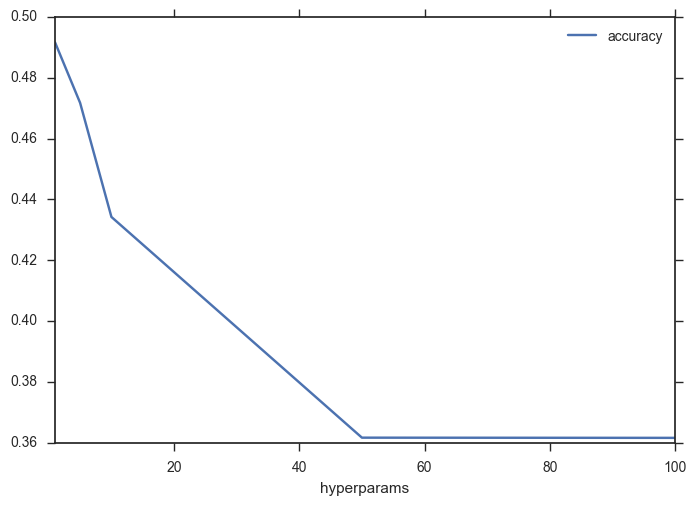

In [111]:
hyperparams = [1, 5, 10, 50, 100]
accuracy = []

for params in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth=params)
    scores = cross_val_score(clf, X, Y_dialect, cv=5)
    accuracy.append(scores.mean())
    
d = pd.DataFrame({"hyperparams": hyperparams, "accuracy": accuracy})
d.plot(x="hyperparams", y="accuracy")

In [127]:
y, sr = librosa.load("/Users/reyno392/Desktop/Programming/bigdataproject/data/allison-20120707-ogo/wav/a0057.wav", sr=22050)
spectrogram = np.abs(librosa.stft(y))
melspec = librosa.feature.melspectrogram(y=y, sr=sr)
stft = np.abs(librosa.stft(y))
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T, axis=0)
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
features = features.reshape(1, -1)

In [128]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X, Y_gender)
pred = clf.predict(features)
pred

array(['Male'], dtype=object)

In [129]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X, Y_age)
pred = clf.predict(features)
pred

array(['Adult'], dtype=object)

In [130]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X, Y_dialect)
pred = clf.predict(features)
pred

array(['American'], dtype=object)

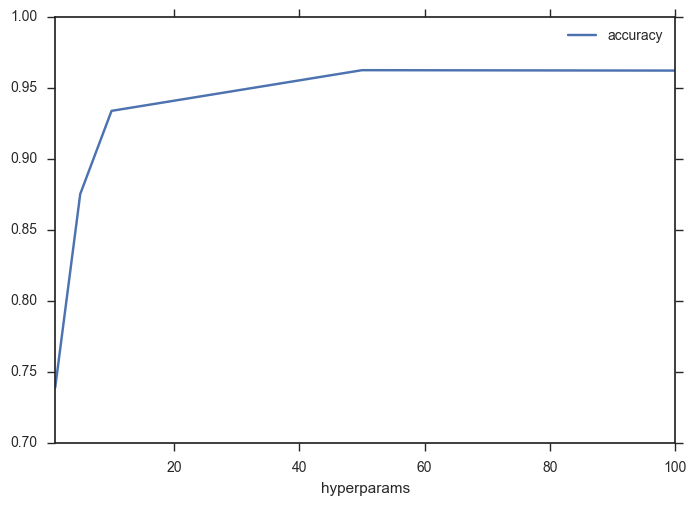

In [149]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, Y_gender)
x_re_gender = pd.DataFrame(data=X_resampled, columns=X.columns)
y_re_gender = pd.DataFrame({"gender": y_resampled})

hyperparams = [1, 5, 10, 50, 100]
accuracy = []

for params in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth=params)
    scores = cross_val_score(clf, x_re_gender, y_re_gender['gender'], cv=5)
    accuracy.append(scores.mean())
    
d = pd.DataFrame({"hyperparams": hyperparams, "accuracy": accuracy})
d.plot(x="hyperparams", y="accuracy")

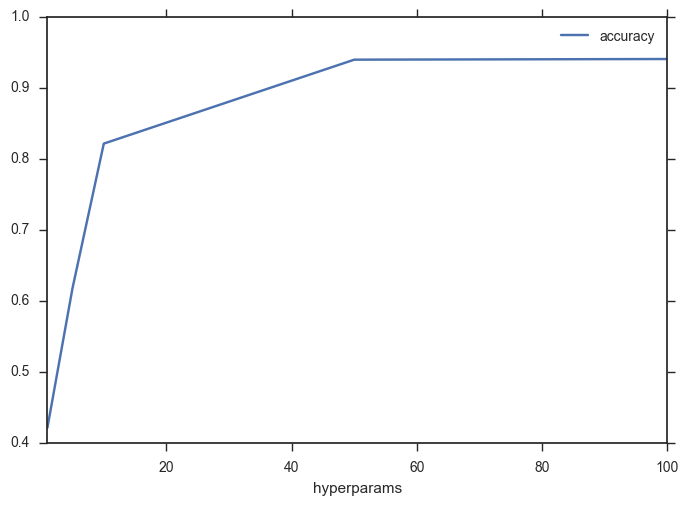

In [151]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, Y_age)
x_re_age = pd.DataFrame(data=X_resampled, columns=X.columns)
y_re_age = pd.DataFrame({"age": y_resampled})

hyperparams = [1, 5, 10, 50, 100]
accuracy = []

for params in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth=params)
    scores = cross_val_score(clf, x_re_age, y_re_age['age'], cv=5)
    accuracy.append(scores.mean())
    
d = pd.DataFrame({"hyperparams": hyperparams, "accuracy": accuracy})
d.plot(x="hyperparams", y="accuracy")

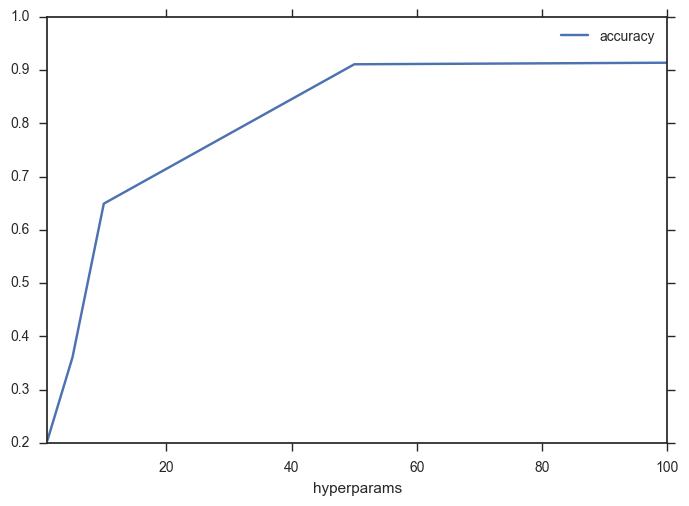

In [152]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, Y_dialect)
x_re_dialect = pd.DataFrame(data=X_resampled, columns=X.columns)
y_re_dialect = pd.DataFrame({"dialect": y_resampled})

hyperparams = [1, 5, 10, 50, 100]
accuracy = []

for params in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth=params)
    scores = cross_val_score(clf, x_re_dialect, y_re_dialect['dialect'], cv=5)
    accuracy.append(scores.mean())
    
d = pd.DataFrame({"hyperparams": hyperparams, "accuracy": accuracy})
d.plot(x="hyperparams", y="accuracy")

In [186]:
clf_gender = tree.DecisionTreeClassifier(max_depth=50)
clf_gender.fit(x_re_gender, y_re_gender['gender'])

clf_gender1 = tree.DecisionTreeClassifier(max_depth=40)
clf_gender1.fit(x_re_gender, y_re_gender['gender'])

clf_gender2 = tree.DecisionTreeClassifier(max_depth=30)
clf_gender2.fit(x_re_gender, y_re_gender['gender'])

clf_gender3 = tree.DecisionTreeClassifier(max_depth=20)
clf_gender3.fit(x_re_gender, y_re_gender['gender'])

clf_gender4 = tree.DecisionTreeClassifier(max_depth=10)
clf_gender4.fit(x_re_gender, y_re_gender['gender'])


clf_age = tree.DecisionTreeClassifier(max_depth=50)
clf_age.fit(x_re_age, y_re_age['age'])

clf_age1 = tree.DecisionTreeClassifier(max_depth=40)
clf_age1.fit(x_re_age, y_re_age['age'])

clf_age2 = tree.DecisionTreeClassifier(max_depth=30)
clf_age2.fit(x_re_age, y_re_age['age'])

clf_age3 = tree.DecisionTreeClassifier(max_depth=20)
clf_age3.fit(x_re_age, y_re_age['age'])

clf_age4 = tree.DecisionTreeClassifier(max_depth=10)
clf_age4.fit(x_re_age, y_re_age['age'])


clf_dialect = tree.DecisionTreeClassifier(max_depth=50)
clf_dialect.fit(x_re_dialect, y_re_dialect['dialect'])

clf_dialect1 = tree.DecisionTreeClassifier(max_depth=40)
clf_dialect1.fit(x_re_dialect, y_re_dialect['dialect'])

clf_dialect2 = tree.DecisionTreeClassifier(max_depth=30)
clf_dialect2.fit(x_re_dialect, y_re_dialect['dialect'])

clf_dialect3 = tree.DecisionTreeClassifier(max_depth=20)
clf_dialect3.fit(x_re_dialect, y_re_dialect['dialect'])

clf_dialect4 = tree.DecisionTreeClassifier(max_depth=10)
clf_dialect4.fit(x_re_dialect, y_re_dialect['dialect'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [221]:
y, sr = librosa.load("/Users/reyno392/Desktop/Programming/bigdataproject/me.wav", sr=22050)
spectrogram = np.abs(librosa.stft(y))
melspec = librosa.feature.melspectrogram(y=y, sr=sr)
stft = np.abs(librosa.stft(y))
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T, axis=0)
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
features = features.reshape(1, -1)
pred = clf_gender2.predict(features)
print(pred)
pred = clf_age2.predict(features)
print(pred)
pred = clf_dialect2.predict(features)
print(pred)

['Male']
['Adult']
['American']


In [198]:
y_pred_gender = clf_gender1.predict(X)
y_pred_age = clf_age1.predict(X)
y_pred_dialect = clf_dialect1.predict(X)

In [199]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("gender accuracy score: " + str(accuracy_score(Y_gender, y_pred_gender)))
print("gender f1_score: " + str(f1_score(Y_gender, y_pred_gender, average="macro")))
print("gender precision: " + str(precision_score(Y_gender, y_pred_gender, average="macro")))
print("gender recall: " + str(recall_score(Y_gender, y_pred_gender, average="macro")) + "\n")

print("age accuracy score: " + str(accuracy_score(Y_age, y_pred_age)))
print("age f1_score: " + str(f1_score(Y_age, y_pred_age, average="macro")))
print("age precision: " + str(precision_score(Y_age, y_pred_age, average="macro")))
print("age recall: " + str(recall_score(Y_age, y_pred_age, average="macro")) + "\n")

print("dialect accuracy score: " + str(accuracy_score(Y_dialect, y_pred_dialect)))
print("dialect f1_score: " + str(f1_score(Y_dialect, y_pred_dialect, average="macro")))
print("dialect precision: " + str(precision_score(Y_dialect, y_pred_dialect, average="macro")))
print("dialect recall: " + str(recall_score(Y_dialect, y_pred_dialect, average="macro")) + "\n")

gender accuracy score: 0.999937019776
gender f1_score: 0.999849886751
gender precision: 0.999735589635
gender recall: 0.999964255076

age accuracy score: 0.996913969014
age f1_score: 0.980250719912
age precision: 0.963784183296
age recall: 0.998799813849

dialect accuracy score: 1.0
dialect f1_score: 1.0
dialect precision: 1.0
dialect recall: 1.0



In [203]:
print(clf_gender.score(X, Y_gender))
print(clf_gender1.score(X, Y_gender))
print(clf_gender2.score(X, Y_gender))
print(clf_gender3.score(X, Y_gender))
print(clf_gender4.score(X, Y_gender))
print()

print(clf_age.score(X, Y_age))
print(clf_age1.score(X, Y_age))
print(clf_age2.score(X, Y_age))
print(clf_age3.score(X, Y_age))
print(clf_age4.score(X, Y_age))
print()

print(clf_dialect.score(X, Y_dialect))
print(clf_dialect1.score(X, Y_dialect))
print(clf_dialect2.score(X, Y_dialect))
print(clf_dialect3.score(X, Y_dialect))
print(clf_dialect4.score(X, Y_dialect))


1.0
0.999937019776
0.999244237309
0.99565436453
0.972666582693

0.999937019776
0.996913969014
0.994268799597
0.96888776924
0.763131376748

1.0
1.0
0.997228870135
0.952890792291
0.513477767981


In [159]:
clf_age.score(X, Y_age)

0.99905529663685599

In [160]:
clf_dialect.score(X, Y_dialect)

1.0

In [205]:
tree.export_graphviz(clf_gender4, out_file='Desktop/Programming/bigdataproject/tree-gender.dot')
tree.export_graphviz(clf_age3, out_file='Desktop/Programming/bigdataproject/tree-age.dot')
tree.export_graphviz(clf_dialect3, out_file='Desktop/Programming/bigdataproject/tree-dialect.dot')

In [217]:
from sklearn.externals import joblib
joblib.dump(clf_gender4, 'Desktop/Programming/bigdataproject/cfl_gender.pkl')
joblib.dump(clf_age3, 'Desktop/Programming/bigdataproject/cfl_age.pkl') 
joblib.dump(clf_dialect, 'Desktop/Programming/bigdataproject/cfl_dialect.pkl') 

['Desktop/Programming/bigdataproject/cfl_dialect.pkl']

In [234]:
from sklearn import neighbors

clf_kneighbors_gender = neighbors.KNeighborsClassifier(n_neighbors=2)
clf_kneighbors_gender.fit(x_re_gender, y_re_gender['gender'])

clf_kneighbors_age = neighbors.KNeighborsClassifier(n_neighbors=3)
clf_kneighbors_age.fit(x_re_age, y_re_age['age'])

clf_kneighbors_dialect = neighbors.KNeighborsClassifier(n_neighbors=7)
clf_kneighbors_dialect.fit(x_re_dialect, y_re_dialect['dialect'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [235]:
print(clf_kneighbors_gender.score(X, Y_gender))
print(clf_kneighbors_age.score(X, Y_age))
print(clf_kneighbors_dialect.score(X, Y_dialect))

0.993387076458
0.9820506361
0.895137926691


In [238]:
y, sr = librosa.load("/Users/reyno392/Desktop/Programming/bigdataproject/derp.wav", sr=22050)
spectrogram = np.abs(librosa.stft(y))
melspec = librosa.feature.melspectrogram(y=y, sr=sr)
stft = np.abs(librosa.stft(y))
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T, axis=0)
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
features = features.reshape(1, -1)
pred = clf_kneighbors_gender.predict(features)
print(pred)
pred = clf_kneighbors_age.predict(features)
print(pred)
pred = clf_kneighbors_dialect.predict(features)
print(pred)

['Male']
['Adult']
['Canadian']
